# Técnicas básicas de clasificación

Para este modelado de clasificación vamos a utilizar el conjunto de datos sobre diabetes. Estos datos contienen información sobre pacientes en un estudio de diabetes. Todos los pacientes son mujeres de al menos 21 años de origen indio Pima.

### Información de los atributos:
<ol>
    <li> PREGNANT: Número de embarazos</li>
    <li> GLUCOSE: Concentración plasmática de glucosa al cabo de 2 horas en una prueba oral de tolerancia a la glucosa (mmol / ml)</li>
    <li> BLOODPRESS: Presión arterial diastólica (mm Hg)</li>
    <li> BODYMASSINDEX: Índice de masa corporal (peso en kg/(altura en m)^2)</li>
    <li> INSULIN: Insulina sérica a las 2 horas (mu U/ml)</li>
    <li> SKINTHICKNESS: Grosor del pliegue cutáneo del tríceps (mm)</li>
    <li> PEDIGREEFUNC: Una síntesis de los antecedentes de diabetes mellitus en familiares y la relación genética de esos familiares con el sujeto.</li>
    <li> AGE: Edad (años)</li>
</ol>

### Output:
<ol><li>DIABETES: (0 or 1)</li></ol>



In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#from mlxtend.plotting import scatterplotmatrix
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression,
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score ,accuracy_score



SyntaxError: trailing comma not allowed without surrounding parentheses (1670758275.py, line 10)

In [ ]:
current_dir = os.getcwd()
data_dir=current_dir+'\\Data'
file_name='diabetes.csv'
df_diabetes=pd.read_csv(data_dir+'\\'+file_name, sep=';')
df_diabetes

,PREGNANT,GLUCOSE,BLOODPRESS,SKINTHICKNESS,INSULIN,BODYMASSINDEX,PEDIGREEFUNC,AGE,DIABETES
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Imprime por pantalla las primeras 5 filas del dataset

In [ ]:
df_diabetes.head()

,PREGNANT,GLUCOSE,BLOODPRESS,SKINTHICKNESS,INSULIN,BODYMASSINDEX,PEDIGREEFUNC,AGE,DIABETES
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Imprime por pantalla los principales estadísticos de las diferentes columnas

In [ ]:
df_diabetes.describe()

,PREGNANT,GLUCOSE,BLOODPRESS,SKINTHICKNESS,INSULIN,BODYMASSINDEX,PEDIGREEFUNC,AGE,DIABETES
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Compruebe si faltan valores en las distintas columnas.

In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PREGNANT       768 non-null    int64  
 1   GLUCOSE        768 non-null    int64  
 2   BLOODPRESS     768 non-null    int64  
 3   SKINTHICKNESS  768 non-null    int64  
 4   INSULIN        768 non-null    int64  
 5   BODYMASSINDEX  768 non-null    float64
 6   PEDIGREEFUNC   768 non-null    float64
 7   AGE            768 non-null    int64  
 8   DIABETES       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Hay que tener en cuenta que puede haber algunos valores que realmente no tengan sentido. Los valores de las columnas 'GLUCOSE','BLOODPRESS','SKINTHICKNESS','INSULIN','BODYMASSINDEX','PEDIGREEFUNC' o 'AGE'  no pueden ser 0 ni negativos. Comprueba si hay alguno de esos atributos que presente esos valores sin sentido.

In [ ]:
df_diabetes.isna().sum()

PREGNANT         0
GLUCOSE          0
BLOODPRESS       0
SKINTHICKNESS    0
INSULIN          0
BODYMASSINDEX    0
PEDIGREEFUNC     0
AGE              0
DIABETES         0
dtype: int64

In [ ]:
df_diabetes.isnull().sum()

PREGNANT         0
GLUCOSE          0
BLOODPRESS       0
SKINTHICKNESS    0
INSULIN          0
BODYMASSINDEX    0
PEDIGREEFUNC     0
AGE              0
DIABETES         0
dtype: int64

Sustituya los valores que no tengan sentido. Pruebe diferentes técnicas

- Sustituya los valores sin sentido por la media/mediana de la columna.
- Reemplace los valores sin sentido utilizando un enfoque KNN
- Reemplazar los valores sin sentido desarrollando un regresor lineal

En la siguiente celda podemos establecer los valores sin sentido por valores nulos.

In [ ]:
import numpy as np
cols=['PREGNANT', 'GLUCOSE','BLOODPRESS', 'SKINTHICKNESS',	'INSULIN','BODYMASSINDEX',	'PEDIGREEFUNC', 'AGE' ]
for col in cols:
    df_diabetes.loc[df_diabetes[col]<=0,col]=np.nan


In [ ]:
df_diabetes_imputer = df_diabetes.copy()
imputer_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
imr = imputer_mean.fit(df_diabetes_imputer.iloc[:,:])
df_diabetes_imputer.iloc[:,:] = imr.transform(df_diabetes_imputer.iloc[:,:])
df_diabetes_imputer.iloc[:,:]



,PREGNANT,GLUCOSE,BLOODPRESS,SKINTHICKNESS,INSULIN,BODYMASSINDEX,PEDIGREEFUNC,AGE,DIABETES
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1


In [ ]:
imputer_mean = SimpleImputer(missing_values=np.nan,strategy='median')
imr = imputer_mean.fit(df_diabetes_imputer.iloc[:,:])
df_diabetes_imputer.iloc[:,:] = imr.transform(df_diabetes_imputer.iloc[:,:])
df_diabetes_imputer.iloc[:,:]




,PREGNANT,GLUCOSE,BLOODPRESS,SKINTHICKNESS,INSULIN,BODYMASSINDEX,PEDIGREEFUNC,AGE,DIABETES
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1


In [ ]:
df_diabetes_imputer_copy = df_diabetes_imputer.copy()
imputer_knn = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform' )
df_diabetes_imputer_copy.iloc[:,:] = imputer_knn.fit_transform(df_diabetes_imputer_copy.iloc[:,:])
df_diabetes_imputer_copy.iloc[:,:]

,PREGNANT,GLUCOSE,BLOODPRESS,SKINTHICKNESS,INSULIN,BODYMASSINDEX,PEDIGREEFUNC,AGE,DIABETES
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1


In [ ]:

x_columns = ['PREGNANT','GLUCOSE','BLOODPRESS',	'SKINTHICKNESS','INSULIN','BODYMASSINDEX','PEDIGREEFUNC','AGE']
y_columns = 'DIABETES'
X = df_diabetes_imputer_copy[x_columns]
y = df_diabetes_imputer_copy[y_columns]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)
model_regresion = LinearRegression()
model_regresion.fit(X_train, y_train)
predicciones = model_regresion.predict(df_diabetes_imputer_copy[x_columns].loc[df_diabetes_imputer_copy[y_columns].isnull()])
df_diabetes_imputer_copy.loc[df_diabetes_imputer_copy[y].isnull(), y] = predicciones
r2 = r2_score(y_test, predicciones)
print(f'R^2 en datos de prueba: {r2}')



ValueError: Found array with 0 sample(s) (shape=(0, 8)) while a minimum of 1 is required by LinearRegression.

Con el dataframe resultante vamos a trazar el boxplot de las diferentes variables explicativas en función de los valores de diabetes

C:\Users\rotan\AppData\Local\Temp\ipykernel_16492\4279218729.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
C:\Users\rotan\AppData\Local\Temp\ipykernel_16492\4279218729.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
C:\Users\rotan\AppData\Local\Temp\ipykernel_16492\4279218729.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
C:\Users\rotan\AppData\Local\Temp\ipykernel_16492\4279218729.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


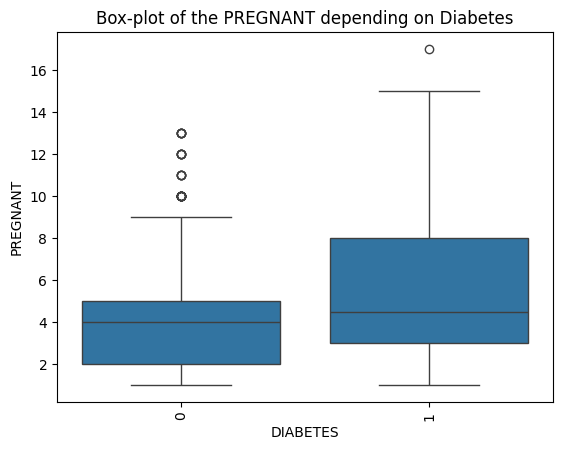

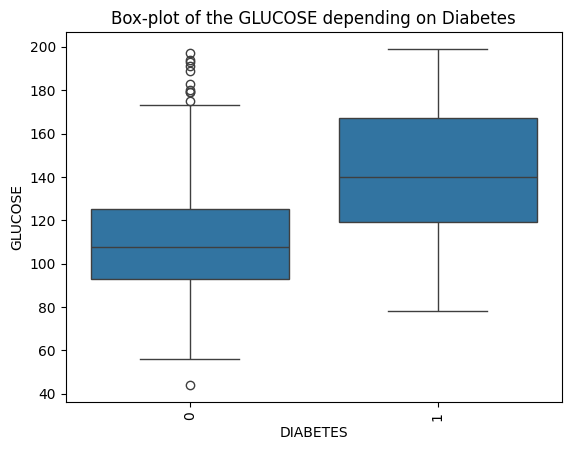

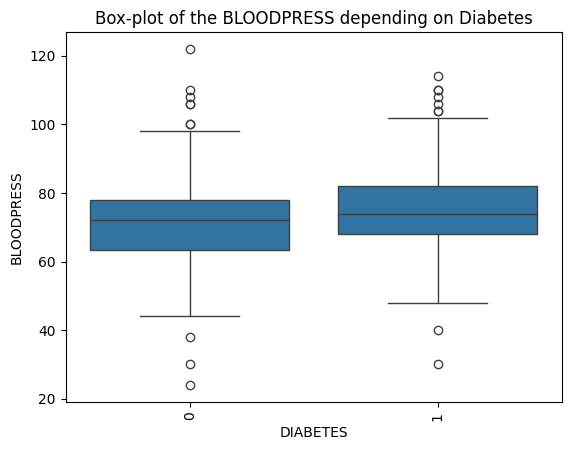

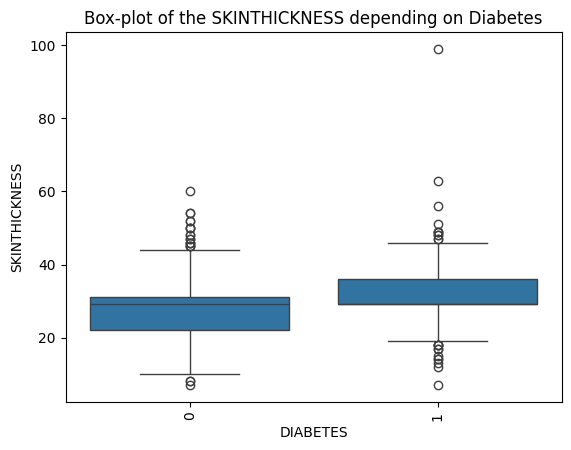

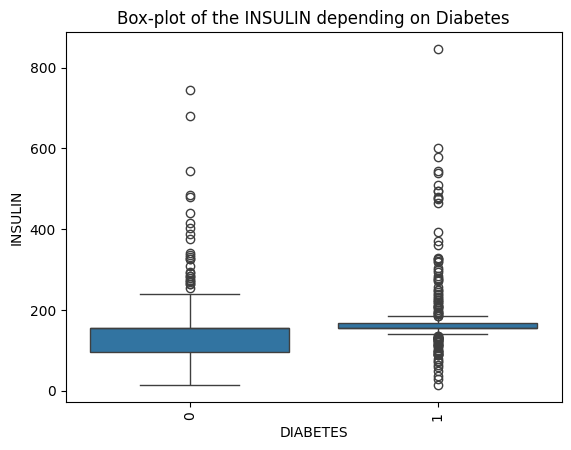

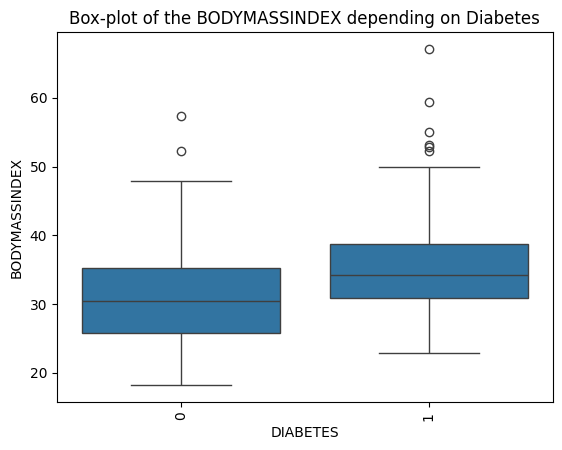

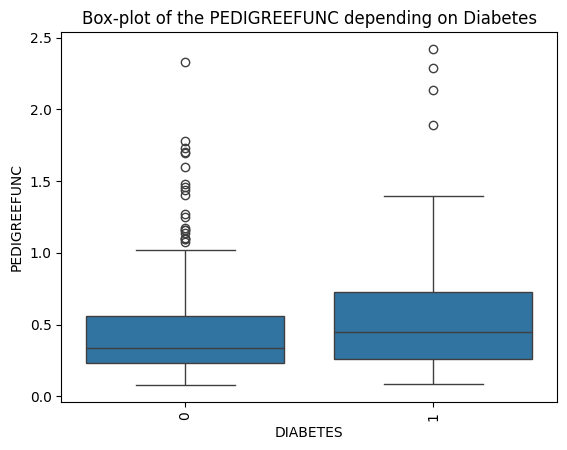

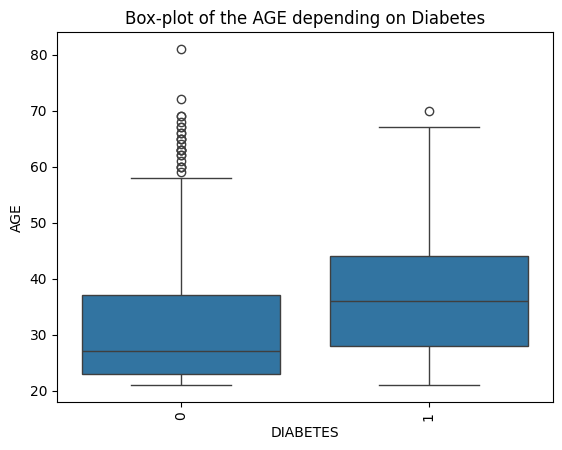

In [ ]:

import matplotlib.pyplot as plt
cols=list(df_diabetes_imputer_copy.columns)
cols.remove('DIABETES')
for col in cols:
    plt.figure()
    ax = sns.boxplot(x='DIABETES', y=col,  data=df_diabetes_imputer_copy)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.title('Box-plot of the {col} depending on Diabetes'.format(col=col))

Trace un mapa de calor del valor absoluto de las correlaciones entre las columnas del marco de datos.

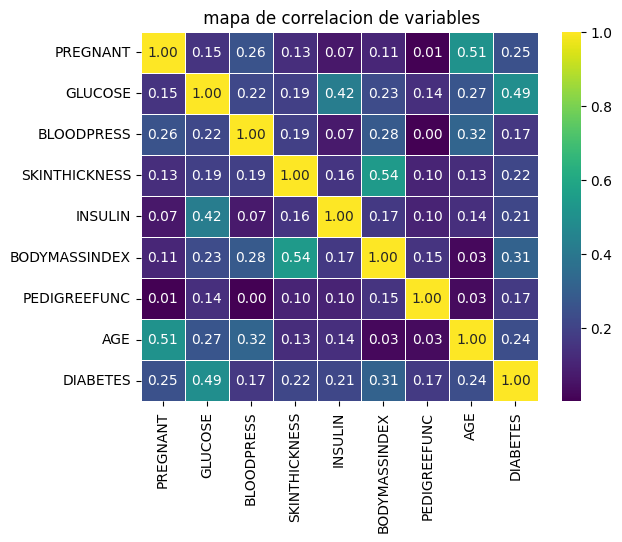

In [ ]:
mapa_correlacion =df_diabetes_imputer_copy.corr().abs()
sns.heatmap(mapa_correlacion,cmap='viridis', annot=True, fmt='.2f', linewidths=.5)
plt.title(' mapa de correlacion de variables')
plt.show()


Divida el dataframe general en un conjunto de datos de entrenamiento (con un 70% de los datos) y un conjunto de datos de prueba. Asegúrese de que tanto el conjunto de datos de entrenamiento como el de prueba están estratificados en función del valor del objetivo.

In [ ]:
from sklearn.model_selection import train_test_split
x=df_diabetes.iloc[:,:-1]
y=df_diabetes.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,shuffle=True,stratify=y)

Con el código de la siguiente celda podemos analizar el valor de las distintas variables en función de la variable objetivo

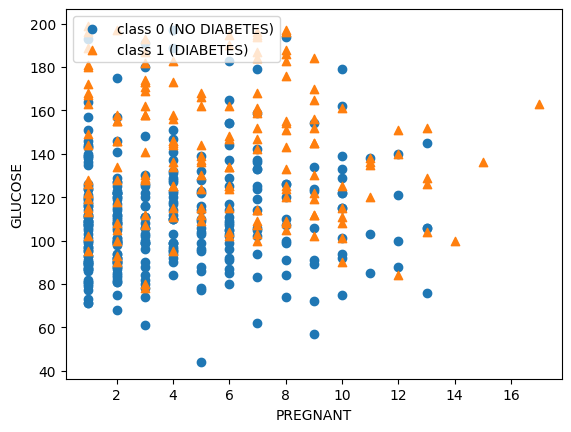

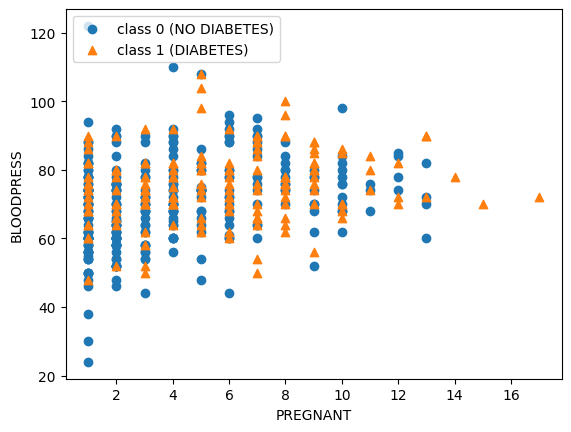

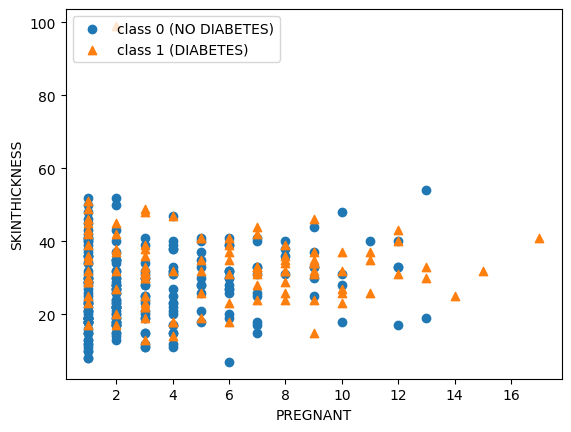

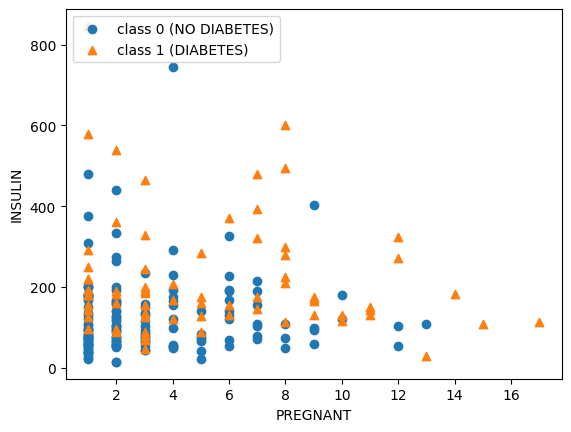

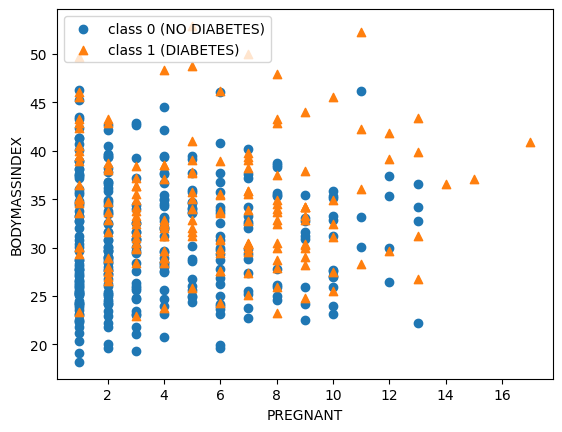

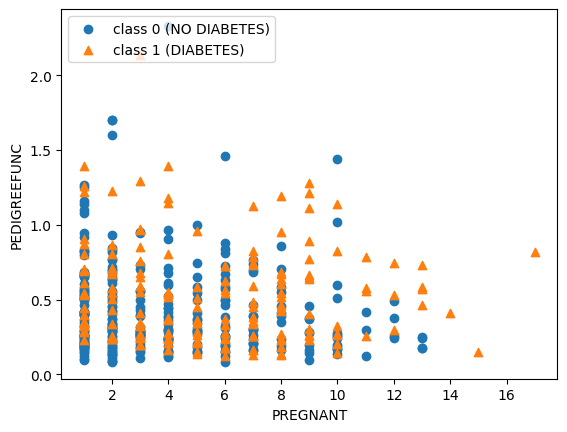

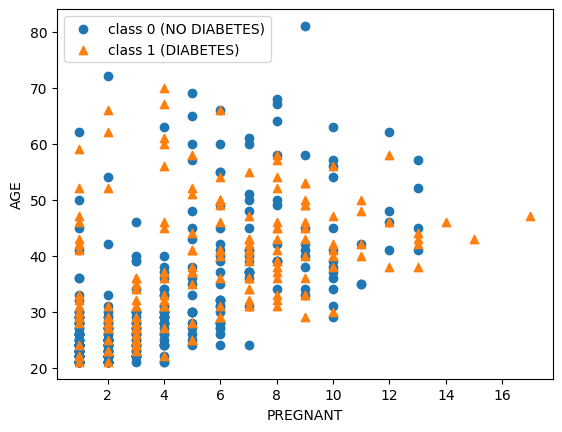

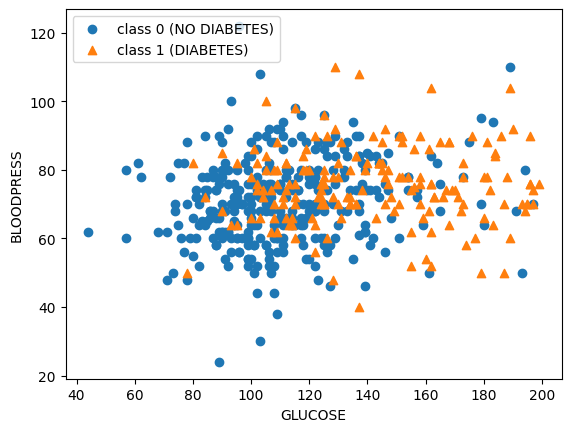

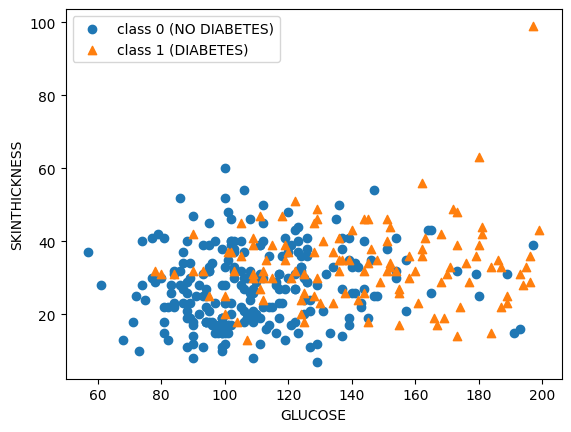

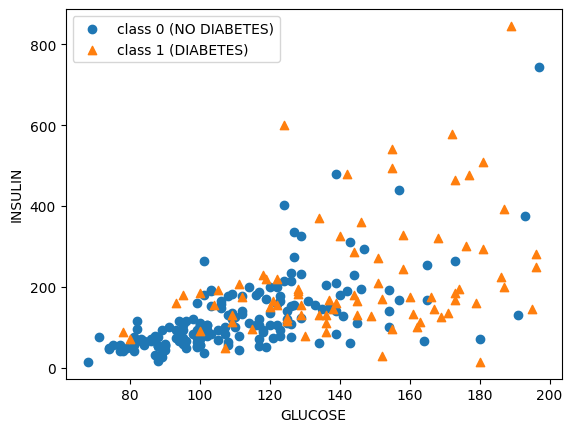

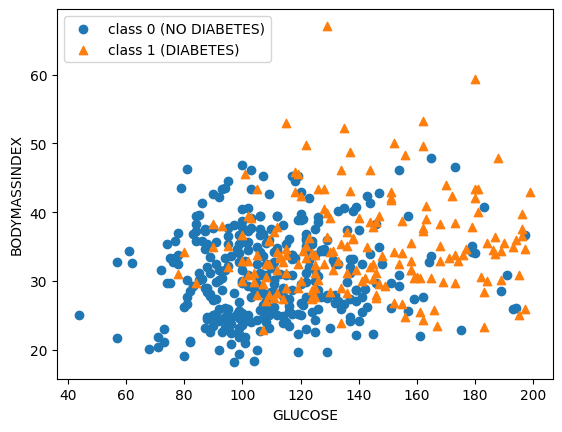

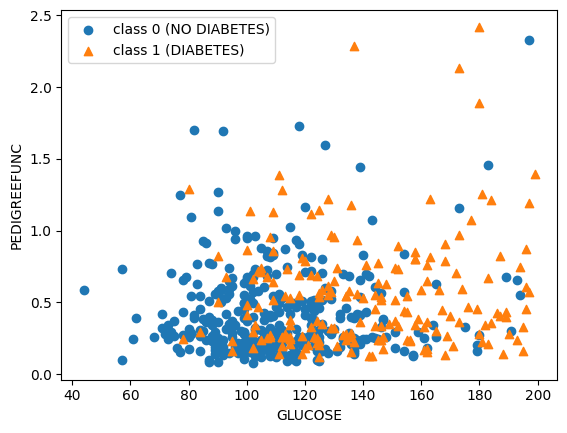

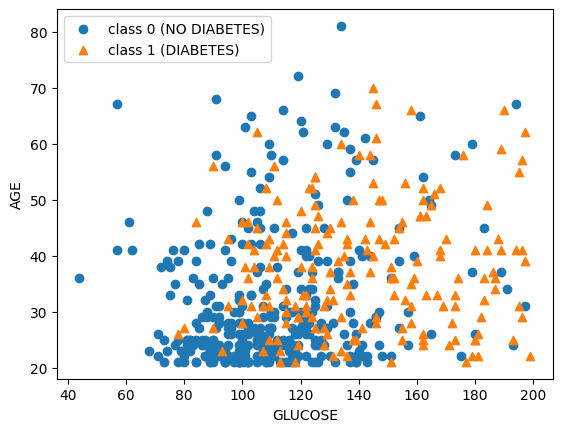

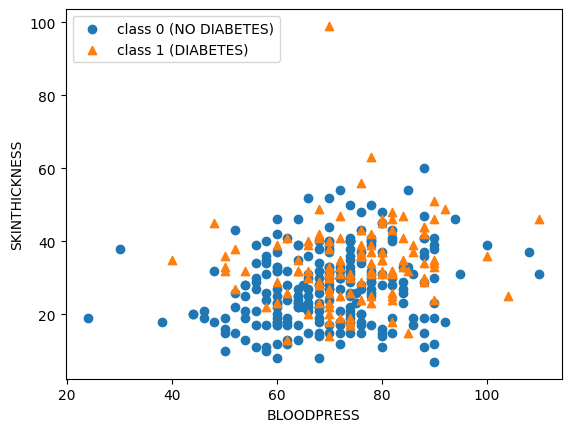

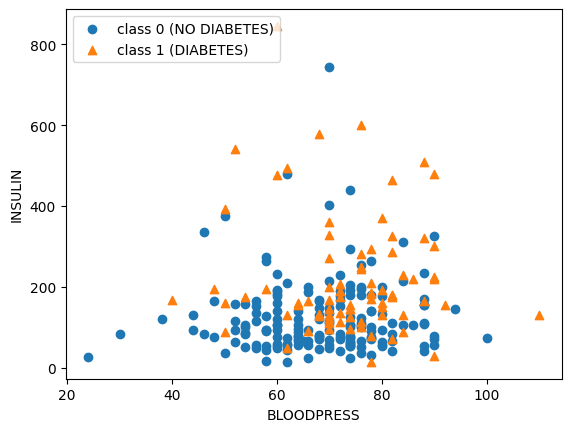

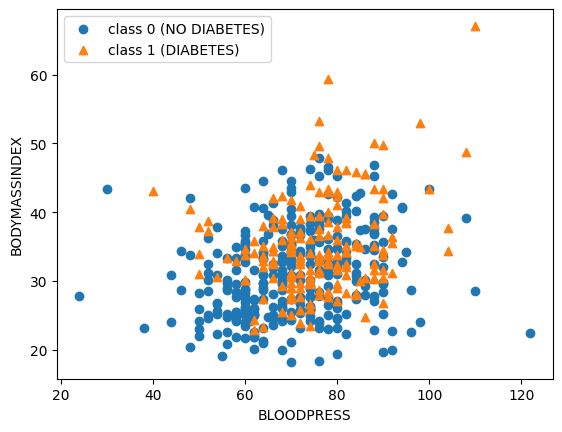

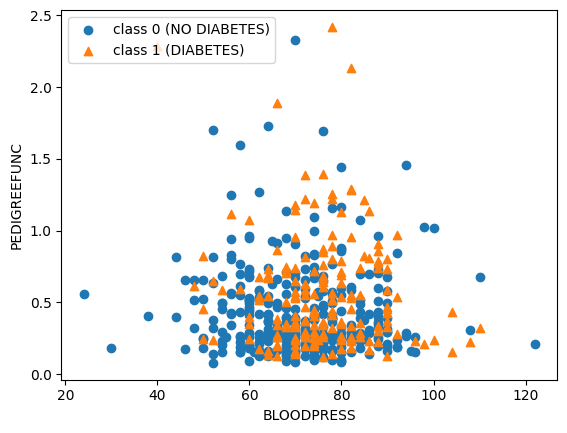

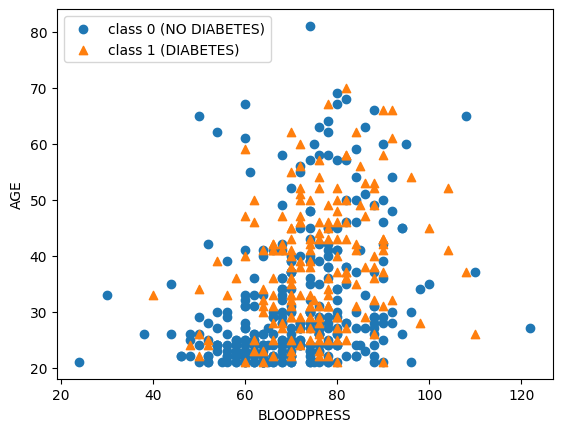

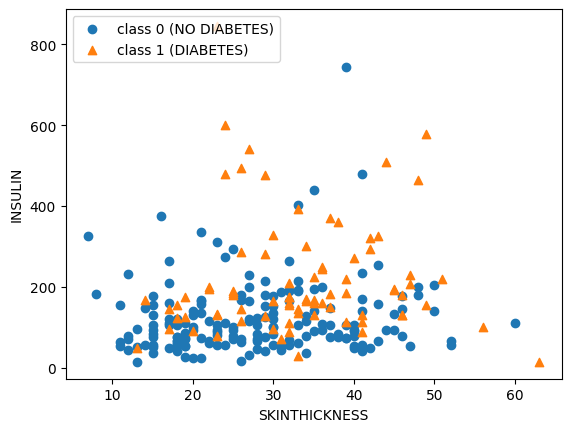

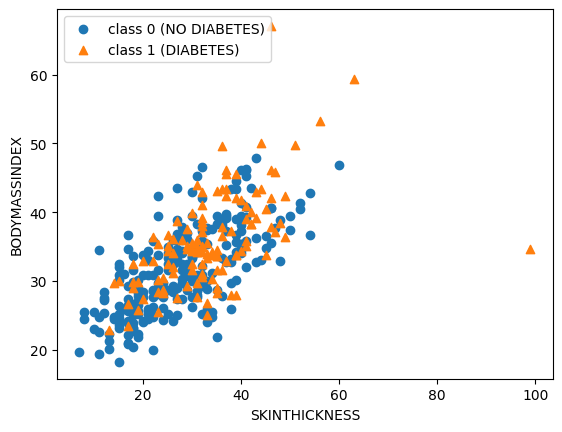

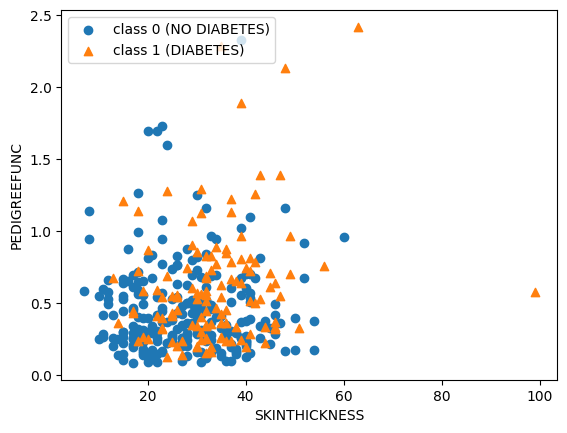

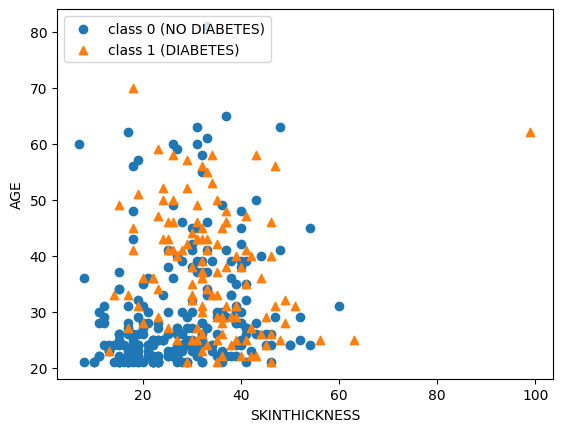

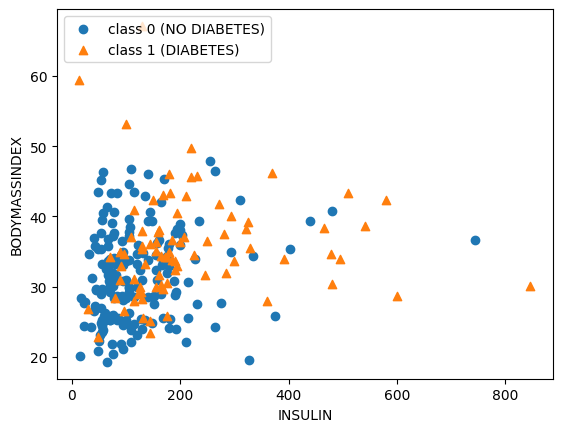

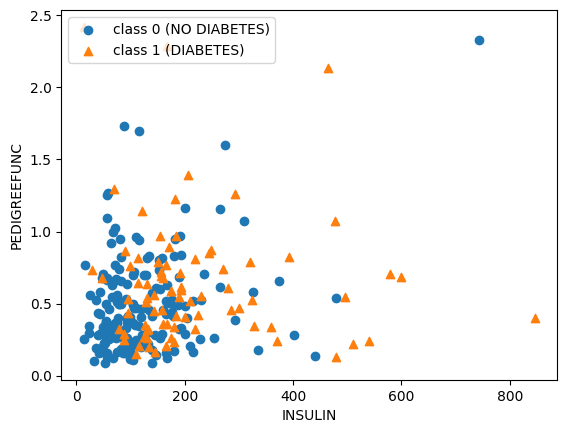

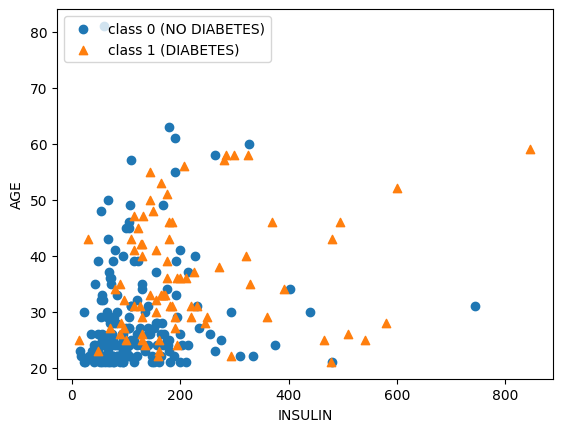

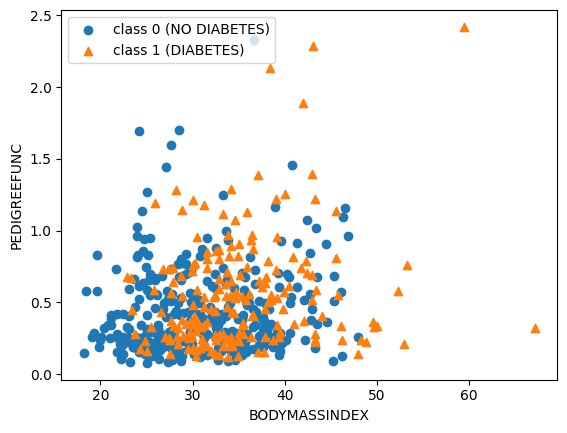

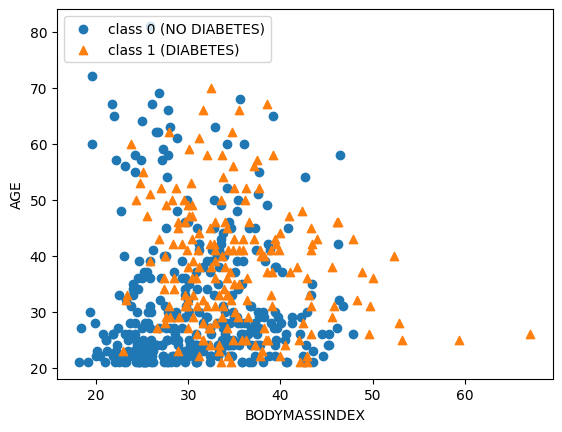

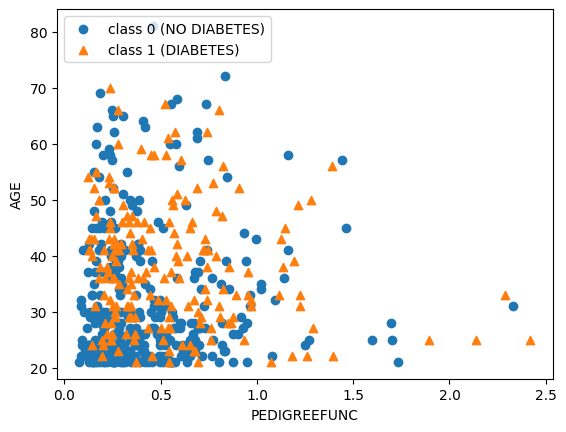

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns= x_train.select_dtypes(include=numerics).columns.tolist()

#col1=numeric_columns[1]
#col2=numeric_columns[2]

for index in range(len(numeric_columns)-1):
    for index2 in range(index+1,len(numeric_columns)):
        col1=numeric_columns[index]
        col2=numeric_columns[index2]
       
        plt.scatter(x_train.loc[y_train == 0, col1],
            x_train.loc[y_train == 0, col2],
            marker='o',
            label='class 0 (NO DIABETES)')

        plt.scatter(x_train.loc[y_train == 1, col1],
            x_train.loc[y_train == 1, col2],
            marker='^',
            label='class 1 (DIABETES)')


        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.legend(loc='upper left')
        plt.show()

### Regresión Logística
Defina un modelo de clasificación LogisticRegression y ajustarlo al conjunto de datos de entrenamiento

In [ ]:
logit_model = LogisticRegression()
logit_model.fit(X_train.values,y_train)




c:\Users\rotan\Master\aprendizaje_automatico\code\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

La siguiente función imprime en pantalla los valores de algunas métricas de clasificación  

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def Metrics(y_true,y_pred,data='train'):
    print('The metrics for the {} dataset are:'.format(data))
    print('Precision: %.3f' % precision_score(y_true, y_pred))
    print('Recall: %.3f' % recall_score(y_true, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_true, y_pred))
    print('F1 Score: %.3f' % f1_score(y_true, y_pred))
    print()
    print()
    print()

Compruebe las métricas de los conjuntos de datos de entrenamiento y prueba

Con el siguiente código imprimiremos por pantalla una matriz de confusión.

In [ ]:


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
logistic_model = LogisticRegression
preds = logistic_model.predict(X_test)
print(classification_report(y_test,preds))
confusion_matrix(y_true=y_test,y_pred=preds)
cm=confusion_matrix(y_true=y_test,y_pred=preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=logistic_model.classes_)
disp.plot()
plt.show()

TypeError: LinearClassifierMixin.predict() missing 1 required positional argument: 'X'

También podemos analizar el valor de la respuesta para distintos valores de los umbrales

In [ ]:
from sklearn import metrics
y_pred_proba = logistic_model.predict_proba(x_train)[::,1]
fpr, tpr,  thresholds = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
#we may want to optimize a metric, for example the square root of the (tpr*(1-fpr))
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Mejor umbral=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0,1], [0,1], linestyle='--', label='Random')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.legend(loc=4)
plt.show()

NameError: name 'logistic_model' is not defined

### LDA
Defina ahora un clasificador de Análisis discriminante lineal y entrénelo con el conjunto de datos de entrenamiento

Imprima la precisión y el resto de métricas de ambos conjuntos

### KNN

Ahora, defina un clasificador KNN con 5 vecinos y una estrategia de distancia para evaluar el peso de todos los vecinos

Compruebe el rendimiento en el conjunto de datos de prueba

Compruebe el performance modificando el número de vecinos

# Práctica de Árboles de Decisión y Random Forest

A continuación vamos a trabajar con árboles de decisión y Random Forest para clasificación.

## Clasificación

Para probar las estrategias de clasificación vamos a trabajar con el conjunto de datos digits


Image Data Shape (1797, 64)
Label Data Shape (1797,)


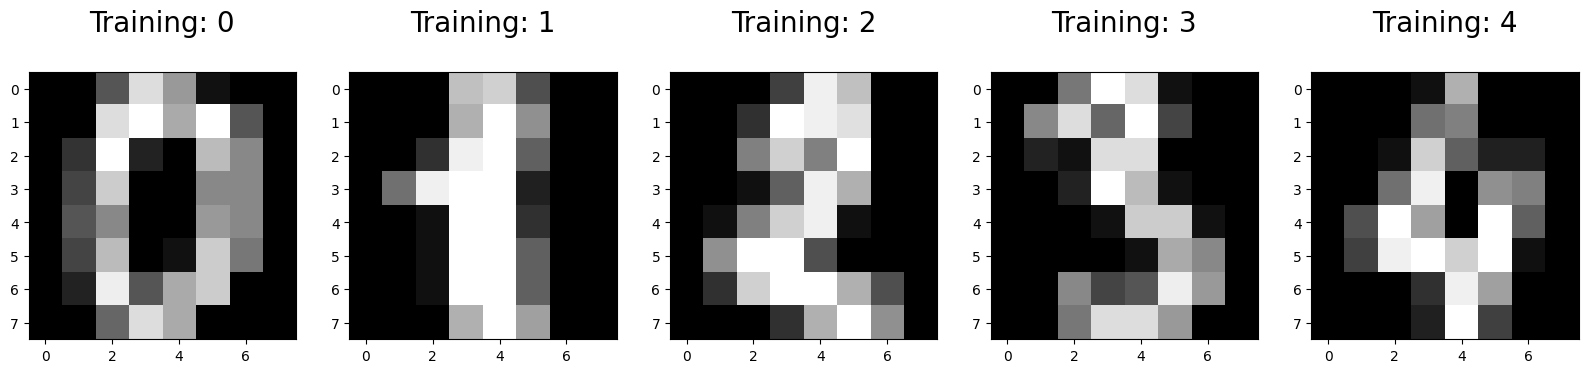

In [6]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os
from sklearn.model_selection import train_test_split
import pandas as pd
cwd=os.getcwd()
digits = load_digits()
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print('Image Data Shape' , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0,stratify=digits.target)
print(Counter(y_train))

NameError: name 'digits' is not defined

### Árboles de decisión

Defina un árbol de decisión con una profundidad máxima de cinco capas, entrenelo e imprimalo por pantalla

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test = train_test_split(x, y ,test_size= 0.25,stratify=y)
first_clf_tree= DecisionTreeClassifier(max_depth=5,random_state=12345)
first_clf_tree.fit(X_train, y_train)

NameError: name 'x' is not defined

Comprobe su rendimiento trazando la matriz de cofusión de la generalización utilizando el conjunto de pruebas.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_cm(test_y,predicted):
    
    cm=confusion_matrix(y_true=test_y,y_pred=predicted)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r',cbar=False);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.show()
pred_train=dct.predict(X_train)
plot_cm(y_train,pred_train)
pred_test=dct.predict(X_test)
plot_cm(y_test,pred_test)

Trace las importancias de los distintos atributos


Realice un ajuste de hiperparámetros utilizando una estrategia de validación cruzada de 5 folds

Busque en el siguiente subconjunto

- 'criterion':['gini','entropy']
- 'max_depth':[4,5,6,7,10]
- 'max_leaf_nodes':[50,60,100]

Imprima los parámetros del árbol optimizado

Imprima su matriz de confusión de generalización

### Bosque aleatorio

Ahora vamos a trabajar con el bosque aleatorio. Definimos un Bosque aleatorio con 150 árboles y con los parámetros del árbol afinado que acabamos de desarrollar

Imprima su matriz de confusión de generalización

Trace las importancias de los distintos atributos

Realice un ajuste de hiperparámetros para definir el conjunto de hiperparámetros que mejor se adapte a su problema. Utilice un esquema de validación cruzada de 5 folds

- 'n_estimators':[100,150,200],
- 'criterion':['gini','entropy']
- 'max_depth':[4,5,6,7,10]
- 'max_leaf_nodes':[50,100]
- 'min_samples_split':[10,20,25]




Imprima los parámetros del mejor modelo

Imprima su matriz de confusión de generalización